In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#导入Apriori关联规则算法包
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import mean_squared_error,r2_score,precision_score,recall_score,f1_score,accuracy_score,confusion_matrix,roc_curve,auc,roc_auc_score,classification_report

In [5]:
df=pd.read_excel('C:/Users/zhouz/Desktop/python_project/Bank_Loan_modelling/Bank_Personal_Loan_Modelling.xlsx',sheet_name='Data')

In [6]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [7]:
df.columns=['ID','年龄','工作经验','年收入','邮编','家庭规模','月均信用卡消费额','文化程度',
                   '押品价值','个贷客户','证券客户','存款客户','网上银行','信用卡客户']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        5000 non-null   int64  
 1   年龄        5000 non-null   int64  
 2   工作经验      5000 non-null   int64  
 3   年收入       5000 non-null   int64  
 4   邮编        5000 non-null   int64  
 5   家庭规模      5000 non-null   int64  
 6   月均信用卡消费额  5000 non-null   float64
 7   文化程度      5000 non-null   int64  
 8   押品价值      5000 non-null   int64  
 9   个贷客户      5000 non-null   int64  
 10  证券客户      5000 non-null   int64  
 11  存款客户      5000 non-null   int64  
 12  网上银行      5000 non-null   int64  
 13  信用卡客户     5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [9]:
df['ID']=df.ID.astype('object')  
df.drop('邮编',axis=1,inplace=True)
df.drop_duplicates(inplace=True)
df.loc[df.duplicated(),'ID'].count()

0

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
年龄,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
工作经验,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
年收入,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
家庭规模,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
月均信用卡消费额,5000.0,1.937913,1.747666,0.0,0.7,1.5,2.5,10.0
文化程度,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
押品价值,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
个贷客户,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
证券客户,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
存款客户,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


In [11]:
df2=df[df.工作经验<0]
df.drop(df2.index,inplace=True)
df.loc[df.工作经验<0,'ID'].count()

0

In [12]:
df.isnull().sum()

ID          0
年龄          0
工作经验        0
年收入         0
家庭规模        0
月均信用卡消费额    0
文化程度        0
押品价值        0
个贷客户        0
证券客户        0
存款客户        0
网上银行        0
信用卡客户       0
dtype: int64

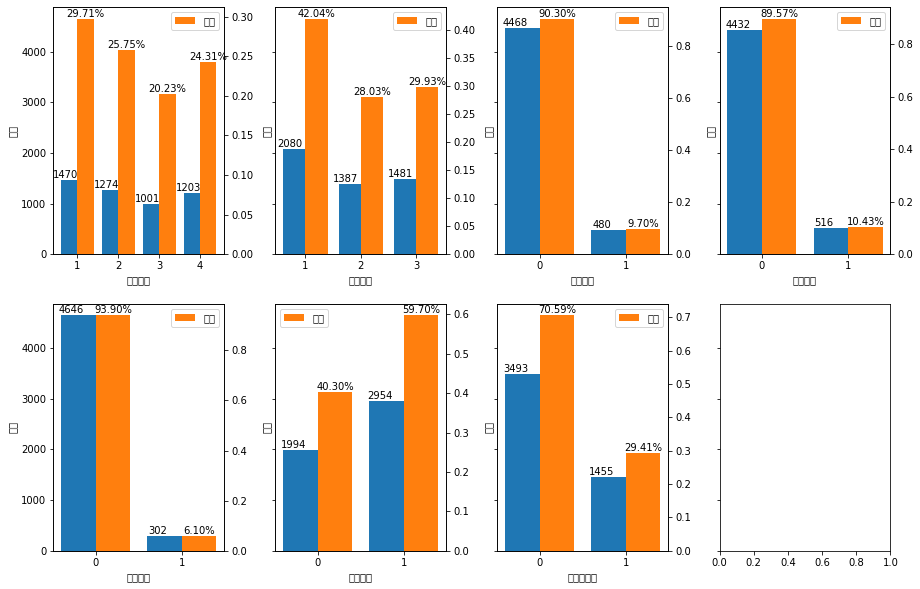

In [13]:
fig,ax = plt.subplots(2,4,sharey = True,figsize=(15,10))
width =0.4   
def plt_bar(m,n,col):
    data = df.groupby(col).ID.count()
    ratio = data/df.ID.count()
    x = np.arange(len(data))
    ax[m,n].set_xticks(x)
    ax[m,n].set_xticklabels(data.index) 
    ax[m,n].set_xlabel(col)
    ax[m,n].set_ylabel('人数')
    ax[m,n].bar(x-width/2,data,width = width,color = 'tab:blue')
    for a,b in zip(x-width/2-0.08,data):
        ax[m,n].text(a,b,b,ha = 'center',va = 'bottom')
        
    ax1 = ax[m,n].twinx()
    ax1.bar(x+width/2,ratio,label='比例',width =width,color='tab:orange')
    for a,b in zip(x+width/2,ratio):
        ax1.text(a,b,'%.2f%%'%(b*100),ha = 'center',va = 'bottom')
    ax1.legend(loc='best')
    plt.subplots_adjust(wspace=0.3)
plt_bar(0,0,'家庭规模')   
plt_bar(0,1,'文化程度')      
plt_bar(0,2,'个贷客户')
plt_bar(0,3,'证券客户')
plt_bar(1,0,'存款客户')
plt_bar(1,1,'网上银行')
plt_bar(1,2,'信用卡客户')

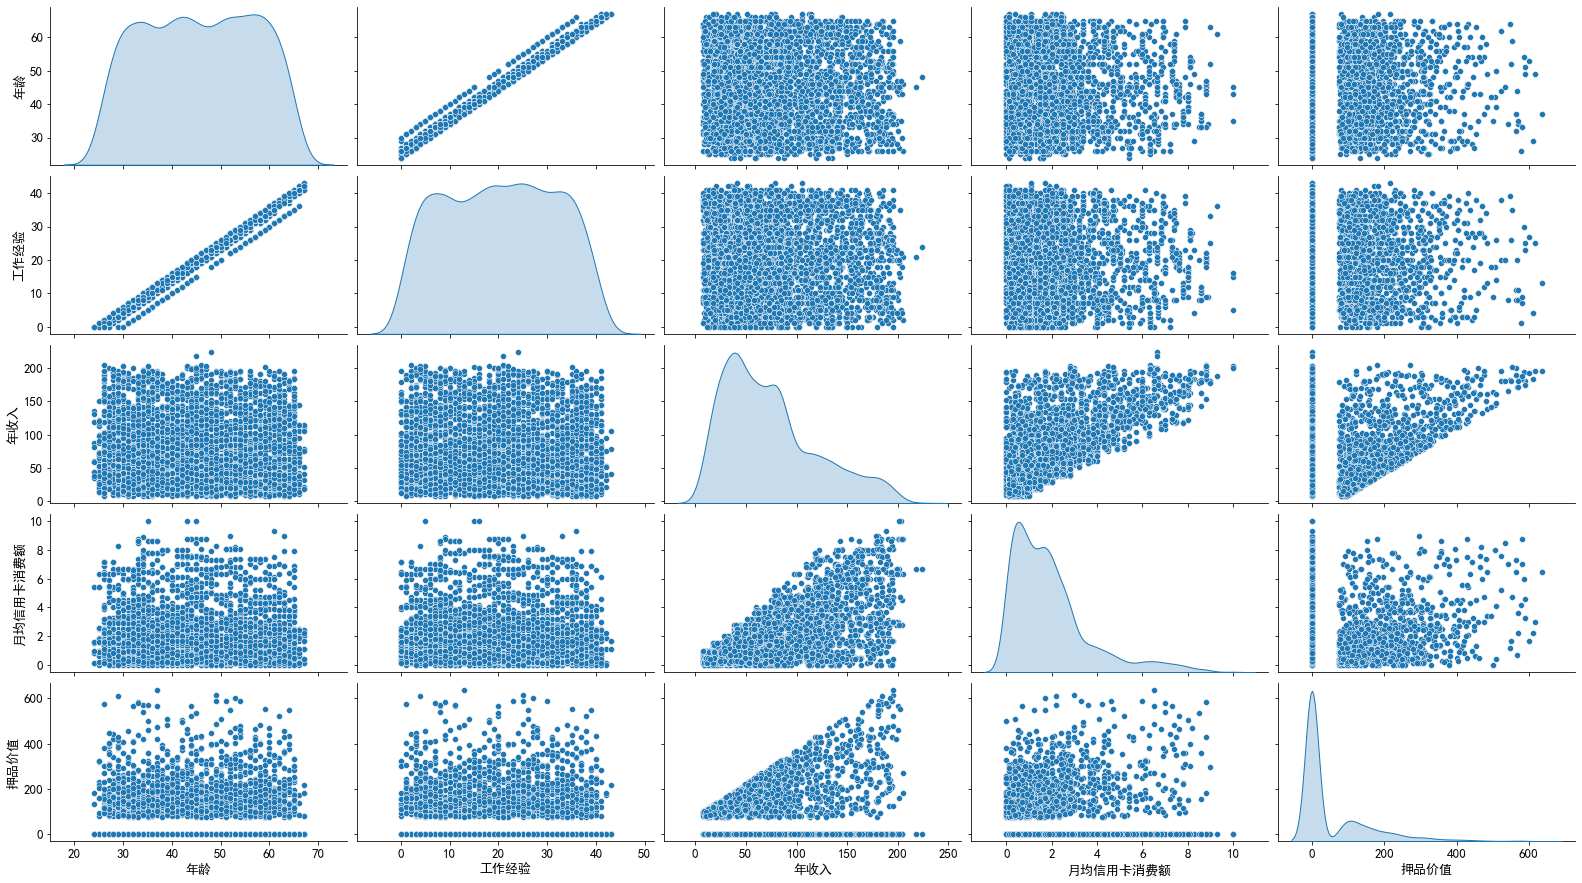

In [14]:
plt.rcParams['font.sans-serif'] =['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font',size=13)
sns.pairplot(df.loc[:,['年龄','工作经验','年收入','月均信用卡消费额','押品价值']],diag_kind='kde',aspect=1.8)

In [15]:
df.loc[:,['年龄','工作经验','年收入','月均信用卡消费额','押品价值']].corr()

,年龄,工作经验,年收入,月均信用卡消费额,押品价值
年龄,1.000000,0.994101,-0.058006,-0.050896,-0.015184
工作经验,0.994101,1.000000,-0.049245,-0.048951,-0.013459
年收入,-0.058006,-0.049245,1.000000,0.646187,0.206921
月均信用卡消费额,-0.050896,-0.048951,0.646187,1.000000,0.109908
押品价值,-0.015184,-0.013459,0.206921,0.109908,1.000000


存款业务客户画像
存款和非存款客户在年龄、年收入、月均信用卡消费额和押品价值上的分布差异

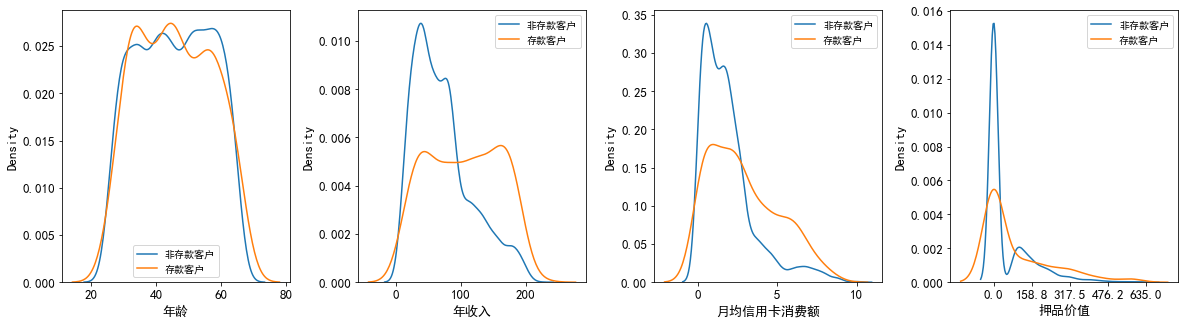

In [16]:
def plt_kde(data,pointsnum):
    a = data.columns[0]
    b = data[data[a]==0]
    c = data[data[a]==1]
    i = data.shape[1]
    fig,ax = plt.subplots(1,i-1,figsize = (20,5))
    for j,k in zip(np.arange(1,i),np.arange(i-1)):
        sns.kdeplot(b.iloc[:,j],ax = ax[k])
        sns.kdeplot(c.iloc[:,j],ax = ax[k])
        plt.xlabel(data.columns.values[j])
        plt.xticks(np.linspace(data.iloc[:,j].min(),data.iloc[:,j].max(),pointsnum))
        
        ax[k].legend(labels =['非'+a,a],loc = 'best',fontsize = 10)
        plt.subplots_adjust(wspace=0.3)
plt_kde(df.loc[:,['存款客户','年龄','年收入','月均信用卡消费额','押品价值']],5)
    

押品价值分箱

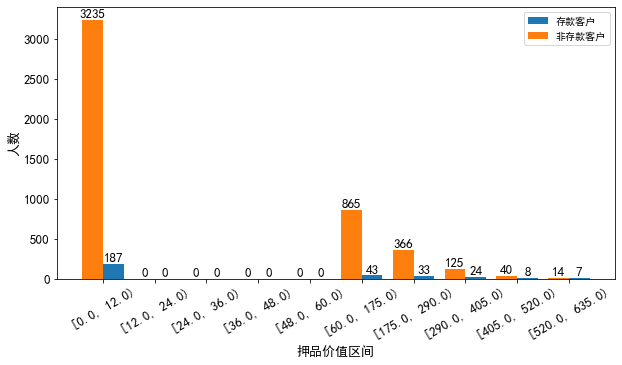

In [17]:
def cut_bar(df,col,num):
    data= df.copy()
    a=sorted(list(set(np.concatenate([np.linspace(0,60,6),np.linspace(60,data.押品价值.max(),6,axis=0)]))))
    data['押品价值分箱'] = pd.cut(data.押品价值,a,right = False,precision = 0)
    b = data[data[col]==1]['押品价值分箱'].value_counts().sort_index()
    c = data[data[col]==0]['押品价值分箱'].value_counts().sort_index()
    fig,ax = plt.subplots(1,1,figsize = (10,5))
    ax.set_xlabel('押品价值区间')
    ax.set_ylabel('人数')
    width = 0.4
    x= np.arange(num)
    ax.set_xticks(x)
    ax.bar(x+width/2,b,width = width,label = col)
    ax.bar(x-width/2,c,width = width,label = '非'+col)
    ax.set_xticklabels(c.index,rotation = 30)

    plt.legend(loc = 'best',fontsize = 10)
    for j,k in zip(x+width/2,b):
        ax.text(j,k,k,ha='center',va='bottom')
    for j,k in zip(x-width/2,c):
        ax.text(j,k,k,ha='center',va='bottom')
cut_bar(df,'存款客户',10)

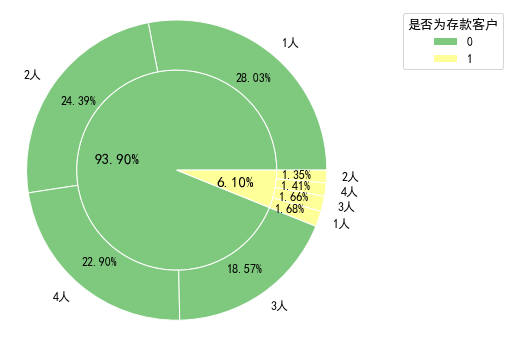

In [28]:
def plt_pie(sub_data1,sub_data2):
    plt.figure(figsize = (6,6))
    cmap=plt.get_cmap("Accent") 
    points = np.arange(len(sub_data1.index))*3
    inner_colors = cmap(points)
    outer_colors = cmap(points.repeat([len(sub_data2[0]),len(sub_data2[1])])) 
    
    plt.pie(sub_data1.values,autopct='%1.2f%%',radius =1,colors=inner_colors,
            pctdistance =0.6,textprops={'fontsize':15},wedgeprops=dict(width=1,edgecolor='w'))
    plt.pie(sub_data2.values,radius=1+0.5,autopct='%1.2f%%',labels=sub_data2.index.get_level_values(1),
            pctdistance=0.8,labeldistance=1.1,colors=outer_colors,
            textprops={'fontsize':12},
            wedgeprops=dict(width=0.5,edgecolor='w'))
    plt.legend(title="是否为%s"%(sub_data1.name),fontsize=12,labels= sub_data1.index,
              loc = 'best',bbox_to_anchor=(1.5,1) )
    
    plt.axis('equal')
data = df.copy()
sub_data1 = data['存款客户'].value_counts()
data['家庭规模(人)'] = data.家庭规模.apply(lambda x:'%d人'%(x))
sub_data2 = data.groupby('存款客户')['家庭规模(人)'].value_counts()
plt_pie(sub_data1,sub_data2)    

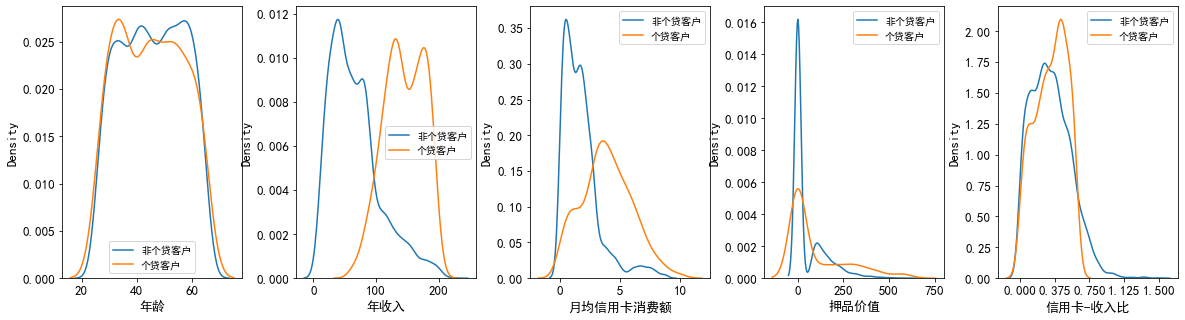

In [32]:
data['信用卡-收入比']=round(data.月均信用卡消费额*12/df.年收入,3)
plt_kde(data.loc[:,['个贷客户','年龄','年收入','月均信用卡消费额','押品价值','信用卡-收入比']],5)

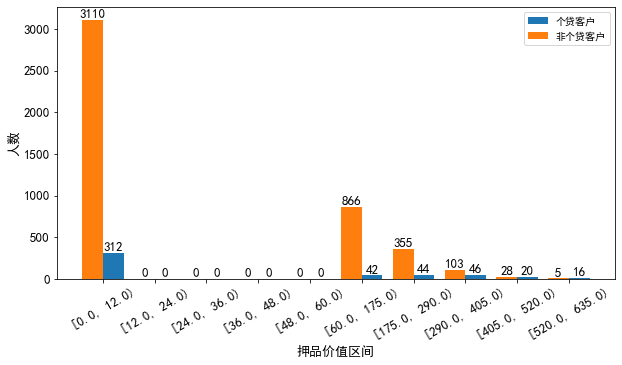

In [33]:
cut_bar(df,'个贷客户',10)

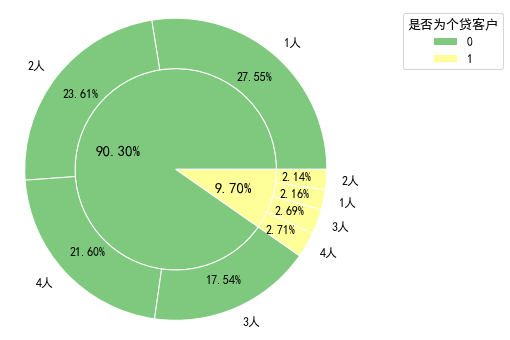

In [34]:
sub_data1 = data['个贷客户'].value_counts()
data['家庭规模(人)'] = data.家庭规模.apply(lambda x:'%d人'%(x))
sub_data2 = data.groupby('个贷客户')['家庭规模(人)'].value_counts()
plt_pie(sub_data1,sub_data2)     


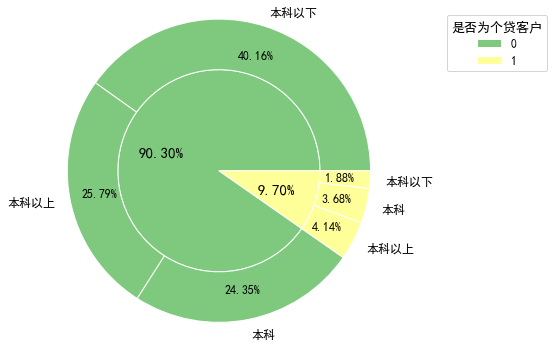

In [35]:
sub_data1 = data['个贷客户'].value_counts()
data['文化程度2']=data['文化程度'].map({1:'本科以下',2:'本科',3:'本科以上'})  
sub_data2 = data.groupby('个贷客户')['文化程度2'].value_counts()
plt_pie(sub_data1,sub_data2)     


In [36]:
frequent_itemsets=apriori(df.iloc[:,-5:],min_support=0.04,use_colnames=True).sort_values('support',ascending=False)
frequent_itemsets

,support,itemsets
3,0.597009,(网上银行)
4,0.294058,(信用卡客户)
9,0.177445,"(网上银行, 信用卡客户)"
1,0.104285,(证券客户)
0,0.097009,(个贷客户)
6,0.064673,"(网上银行, 证券客户)"
2,0.061035,(存款客户)
5,0.058812,"(个贷客户, 网上银行)"
7,0.057195,"(网上银行, 存款客户)"
8,0.048504,"(信用卡客户, 存款客户)"


In [37]:
rules=association_rules(frequent_itemsets,metric='confidence',min_threshold=0.7).sort_values('confidence',ascending=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(存款客户),(网上银行),0.061035,0.597009,0.057195,0.937086,1.569635,0.020757,6.405438
3,"(信用卡客户, 存款客户)",(网上银行),0.048504,0.597009,0.045271,0.933333,1.563349,0.016313,6.044867
1,(存款客户),(信用卡客户),0.061035,0.294058,0.048504,0.794702,2.702533,0.030557,3.438620
2,"(网上银行, 存款客户)",(信用卡客户),0.057195,0.294058,0.045271,0.791519,2.691710,0.028452,3.386128
4,(存款客户),"(网上银行, 信用卡客户)",0.061035,0.177445,0.045271,0.741722,4.180000,0.034440,3.184763


存款客户中个贷客户比例

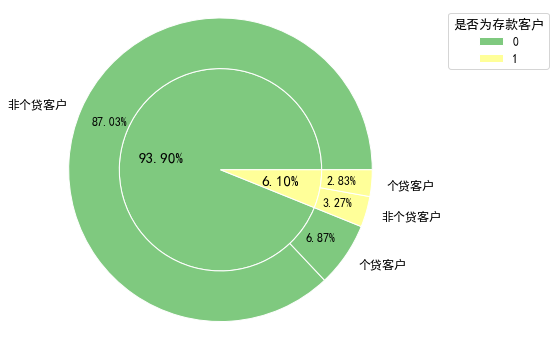

In [38]:
sub_data1 = data['存款客户'].value_counts()
data['是否个贷']=data.个贷客户.apply(lambda x:'个贷客户' if x==1 else '非个贷客户')
sub_data2=data.groupby('存款客户')['是否个贷'].value_counts()
plt_pie(sub_data1,sub_data2)

存款客户中的潜在个贷客户特征


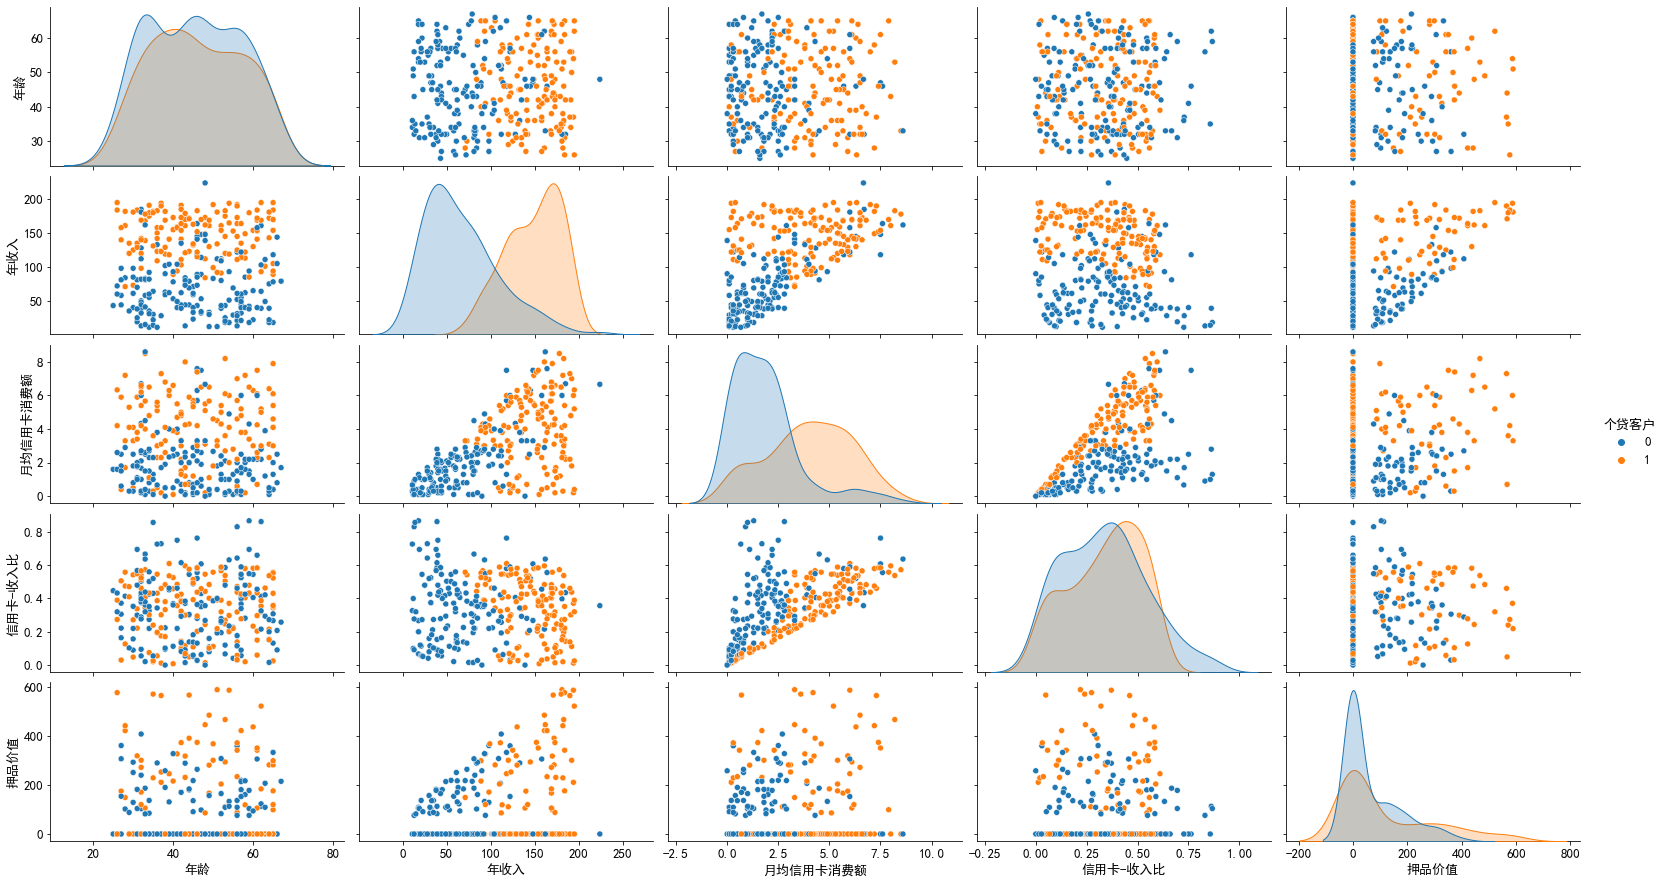

In [39]:
df['信用卡-收入比']=round(df.月均信用卡消费额*12/df.年收入,3)
data_cd=df[df.存款客户==1]
plt.rcParams['font.sans-serif'] =['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font',size=13)
sns.pairplot(data_cd.loc[:,['个贷客户','年龄','年收入','月均信用卡消费额','信用卡-收入比','押品价值']],
             vars=['年龄','年收入','月均信用卡消费额','信用卡-收入比','押品价值'],hue='个贷客户',diag_kind='kde',aspect=1.8)

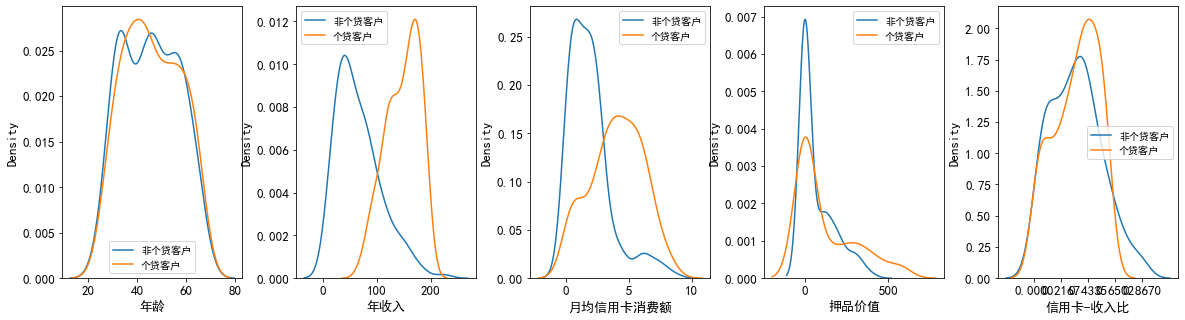

In [40]:
plt_kde(data_cd.loc[:,['个贷客户','年龄','年收入','月均信用卡消费额','押品价值','信用卡-收入比']],5)

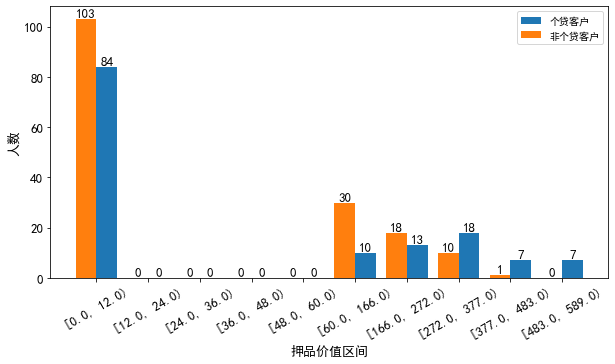

In [41]:
cut_bar(df[df.存款客户==1],'个贷客户',10)

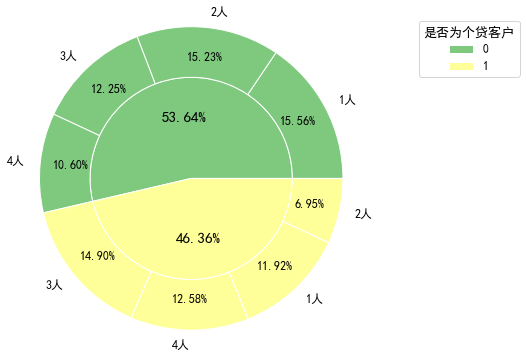

In [42]:
sub_data1 = data_cd['个贷客户'].value_counts()
data_cd['家庭规模(人)'] = data_cd.家庭规模.apply(lambda x:'%d人'%(x))
sub_data2 = data_cd.groupby('个贷客户')['家庭规模(人)'].value_counts()
plt_pie(sub_data1,sub_data2)     


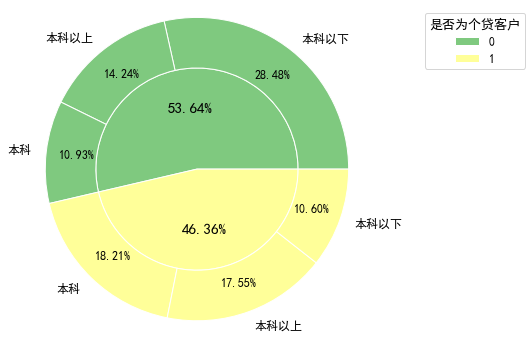

In [43]:
sub_data1 = data_cd['个贷客户'].value_counts()
data_cd['文化程度2']=data_cd['文化程度'].map({1:'本科以下',2:'本科',3:'本科以上'})  
sub_data2 = data_cd.groupby('个贷客户')['文化程度2'].value_counts()
plt_pie(sub_data1,sub_data2)     


In [44]:
df=pd.concat([df,df2],ignore_index=True,sort=False)

In [45]:
df

,ID,年龄,工作经验,年收入,家庭规模,月均信用卡消费额,文化程度,押品价值,个贷客户,证券客户,存款客户,网上银行,信用卡客户,信用卡-收入比
0,1,25,1,49,4,1.60,1,0,0,1,0,0,0,0.392
1,2,45,19,34,3,1.50,1,0,0,1,0,0,0,0.529
2,3,39,15,11,1,1.00,1,0,0,0,0,0,0,1.091
3,4,35,9,100,1,2.70,2,0,0,0,0,0,0,0.324
4,5,35,8,45,4,1.00,2,0,0,0,0,0,1,0.267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4412,23,-2,75,2,1.80,2,0,0,0,0,1,1,NaN
4996,4482,25,-2,35,4,1.00,3,0,0,0,0,1,0,NaN
4997,4515,24,-3,41,4,1.00,3,0,0,0,0,1,0,NaN
4998,4583,25,-1,69,3,0.30,3,0,0,0,0,1,0,NaN


特征衍生



In [46]:
df['年收入大于102']=np.where(df.年收入>=102,1,0).astype('int')
df['月均信用卡消费额大于3']=np.where(df.月均信用卡消费额>=3,1,0).astype('int')
df['存款到个贷的转化']=df['年收入大于102']+df['月均信用卡消费额大于3']+df.存款客户

In [47]:
df

,ID,年龄,工作经验,年收入,家庭规模,月均信用卡消费额,文化程度,押品价值,个贷客户,证券客户,存款客户,网上银行,信用卡客户,信用卡-收入比,年收入大于102,月均信用卡消费额大于3,存款到个贷的转化
0,1,25,1,49,4,1.60,1,0,0,1,0,0,0,0.392,0,0,0
1,2,45,19,34,3,1.50,1,0,0,1,0,0,0,0.529,0,0,0
2,3,39,15,11,1,1.00,1,0,0,0,0,0,0,1.091,0,0,0
3,4,35,9,100,1,2.70,2,0,0,0,0,0,0,0.324,0,0,0
4,5,35,8,45,4,1.00,2,0,0,0,0,0,1,0.267,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4412,23,-2,75,2,1.80,2,0,0,0,0,1,1,NaN,0,0,0
4996,4482,25,-2,35,4,1.00,3,0,0,0,0,1,0,NaN,0,0,0
4997,4515,24,-3,41,4,1.00,3,0,0,0,0,1,0,NaN,0,0,0
4998,4583,25,-1,69,3,0.30,3,0,0,0,0,1,0,NaN,0,0,0


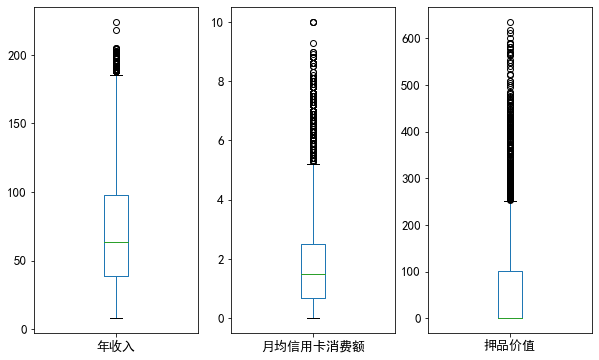

In [48]:
fig,axes=plt.subplots(1,3,figsize=(10,6))
for i,index in zip(np.arange(3),['年收入','月均信用卡消费额','押品价值']):
    df[index].plot(ax=axes[i],kind='box')

In [49]:
from sklearn import preprocessing as prep
for i in ['年收入','月均信用卡消费额','押品价值']:
    df[i]=prep.StandardScaler().fit_transform(df[i].values.reshape(-1,1)) 

In [50]:
df

,ID,年龄,工作经验,年收入,家庭规模,月均信用卡消费额,文化程度,押品价值,个贷客户,证券客户,存款客户,网上银行,信用卡客户,信用卡-收入比,年收入大于102,月均信用卡消费额大于3,存款到个贷的转化
0,1,25,1,-0.538229,4,-0.193371,1,-0.555524,0,1,0,0,0,0.392,0,0,0
1,2,45,19,-0.864109,3,-0.250595,1,-0.555524,0,1,0,0,0,0.529,0,0,0
2,3,39,15,-1.363793,1,-0.536720,1,-0.555524,0,0,0,0,0,1.091,0,0,0
3,4,35,9,0.569765,1,0.436103,2,-0.555524,0,0,0,0,0,0.324,0,0,0
4,5,35,8,-0.625130,4,-0.536720,2,-0.555524,0,0,0,0,1,0.267,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4412,23,-2,0.026631,2,-0.078921,2,-0.555524,0,0,0,1,1,NaN,0,0,0
4996,4482,25,-2,-0.842384,4,-0.536720,3,-0.555524,0,0,0,1,0,NaN,0,0,0
4997,4515,24,-3,-0.712032,4,-0.536720,3,-0.555524,0,0,0,1,0,NaN,0,0,0
4998,4583,25,-1,-0.103721,3,-0.937294,3,-0.555524,0,0,0,1,0,NaN,0,0,0


In [51]:
x=np.array(df.loc[:,['年收入','月均信用卡消费额','年收入大于102','月均信用卡消费额大于3','押品价值',
                     '家庭规模','文化程度','存款客户','存款到个贷的转化']])
y=np.array(df.个贷客户)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
print('训练集样本量为：',x_train.shape[0],'个')
print('测试集样本量为：',x_test.shape[0],'个')
print('上采样前训练集中正例有%d个，反例有%d个'%((y_train==1).sum(),(y_train==0).sum()))

训练集样本量为： 3500 个
测试集样本量为： 1500 个
上采样前训练集中正例有334个，反例有3166个


In [52]:
xtrain,ytrain=SMOTE(random_state=1).fit_resample(x_train,y_train.ravel()) 
print('SMOTE上采样后，训练集样本量为：',xtrain.shape[0],'个')

print('SMOTE上采样后，样本总量为：',xtrain.shape[0]+x_test.shape[0],'个')
print('SOMTE上采样后，训练集中正例有：',(ytrain==1).sum(),'个')
print('SOMTE上采样后，训练集中反例有：',(ytrain==0).sum(),'个') 

SMOTE上采样后，训练集样本量为： 6332 个
SMOTE上采样后，样本总量为： 7832 个
SOMTE上采样后，训练集中正例有： 3166 个
SOMTE上采样后，训练集中反例有： 3166 个


In [53]:
class Modeling():
    def __init__(self,alg,params,cvnums):
        self.alg=alg
        self.name=alg.__class__.__name__ 
        self.params=params
        self.cvnums=cvnums
    def grid_train_test(self,xtrain,ytrain,x_test,y_test): 
        grid=GridSearchCV(self.alg,self.params,cv=self.cvnums,scoring='accuracy') 
        grid.fit(xtrain,ytrain)        
        self.best_params=grid.best_params_ 
        self.best_estimator=grid.best_estimator_
        self.cv_results=grid.cv_results_ 
        self.train_accuracy=grid.best_score_ 
        self.best_estimator.fit(xtrain,ytrain)
        self.pred_label=self.best_estimator.predict(x_test) 
        try:
            self.pred_proba=self.best_estimator.decision_function(x_test)
        except:
            self.pred_proba=self.best_estimator.predict_proba(x_test)[:,1] 
        self.precision_score=precision_score(y_test,self.pred_label) 
        self.recall_score=recall_score(y_test,self.pred_label) 
        self.f1_score=f1_score(y_test,self.pred_label)
        self.accuracy_score=accuracy_score(y_test,self.pred_label) 
        self.auc=round(roc_auc_score(y_test,self.pred_proba),4) 
    def learningcurve(self,xtrain,ytrain):
        train_sizes,train_scores,test_scores,fit_times,_=learning_curve(self.alg,xtrain,ytrain,
                                                                        cv=ShuffleSplit(n_splits=100,test_size=0.2,random_state=2),
                                                                        return_times=True)
        train_scores_mean=np.mean(train_scores,axis=1)
        test_scores_mean=np.mean(test_scores,axis=1)
        plt.rc('font',size=13)
        plt.rcParams['font.sans-serif'] =['SimHei']
        fig,axes=plt.subplots(1,2,figsize=(16,4))
        axes[0].set_title(self.name)
        axes[0].set_xlabel('训练样本数')
        axes[0].set_ylabel('准确率')
        axes[0].plot(train_sizes,train_scores_mean,'o-',color='r',label='训练集平均准确率')
        axes[0].plot(train_sizes,test_scores_mean,'o-',color='g',label='测试集平均准确率')
        axes[0].legend(loc='best')
        axes[0].grid()
        cv_results=pd.DataFrame(self.cv_results)
        if len(self.params)==1:
            CV_RESULTS=cv_results.pivot_table(values='mean_test_score',index=cv_results.columns[4])
            axes[1].set_title(self.name)
            axes[1].set_ylabel('准确率')
            CV_RESULTS.plot(ax=axes[1],marker='o')
        else:
            CV_RESULTS=cv_results.pivot_table(values='mean_test_score',index=cv_results.columns[4],columns=cv_results.columns[5])
            axes[1].set_title(self.name+'_SCORE')
            sns.heatmap(CV_RESULTS,annot=True,ax=axes[1])
        
#         else:
#             heatmap_col=[]
#             for i in np.arange(len(params)-1):
#                 heatmap_col.append(cv_results.columns[5+i])
#             CV_RESULTS=cv_results.pivot_table(values='mean_test_score',index=cv_results.columns[4],columns=heatmap_col)
#             axes[1].set_title(self.name+'_SCORE')
#             sns.heatmap(CV_RESULTS,annot=True,ax=axes[1])
        plt.subplots_adjust(wspace=0.25)
    

In [54]:
knn=Modeling(KNeighborsClassifier(),{'n_neighbors':np.linspace(1,10,10).astype('int'),'weights':['uniform','distance']},5)
knn.grid_train_test(xtrain,ytrain,x_test,y_test)
lr=Modeling(LogisticRegression(),{'C':np.linspace(0.6,1.5,10)},5)
lr.grid_train_test(xtrain,ytrain,x_test,y_test)
svm=Modeling(SVC(probability=True),{'C':np.linspace(60,100,5),'gamma':[0.22,0.24,0.26,0.28,0.30]},5)
svm.grid_train_test(xtrain,ytrain,x_test,y_test)
rf=Modeling(RandomForestClassifier(),{'n_estimators':np.linspace(50,200,4).astype('int')},5)
rf.grid_train_test(xtrain,ytrain,x_test,y_test)

In [55]:
def resulst_contrast(algclasslist):
    algname=[]
    best_params=[]
    precision_score=[]
    recall_score=[]
    f1_score=[]
    accuracy_score=[]
    auc=[]
    for alg in algclasslist:
        algname.append(alg.name)
        best_params.append(alg.best_params)
        precision_score.append(alg.precision_score)
        recall_score.append(alg.recall_score)
        f1_score.append(alg.f1_score)
        accuracy_score.append(alg.accuracy_score)
        auc.append(round(alg.auc,4))
    return pd.DataFrame({'模型':algname,'最优参数':best_params,'查准率':precision_score,'查全率':recall_score,'f1得分':f1_score,
                         '准确率':accuracy_score,'auc':auc}).set_index('模型').sort_values(by='auc',ascending=False)
resulst_contrast([knn,lr,svm,rf])


,最优参数,查准率,查全率,f1得分,准确率,auc
模型,,,,,,
RandomForestClassifier,{'n_estimators': 100},0.909677,0.965753,0.936877,0.987333,0.9988
SVC,"{'C': 100.0, 'gamma': 0.3}",0.892617,0.910959,0.901695,0.980667,0.9881
LogisticRegression,{'C': 1.1},0.494545,0.931507,0.646081,0.900667,0.9789
KNeighborsClassifier,"{'n_neighbors': 1, 'weights': 'uniform'}",0.903448,0.897260,0.900344,0.980667,0.9435


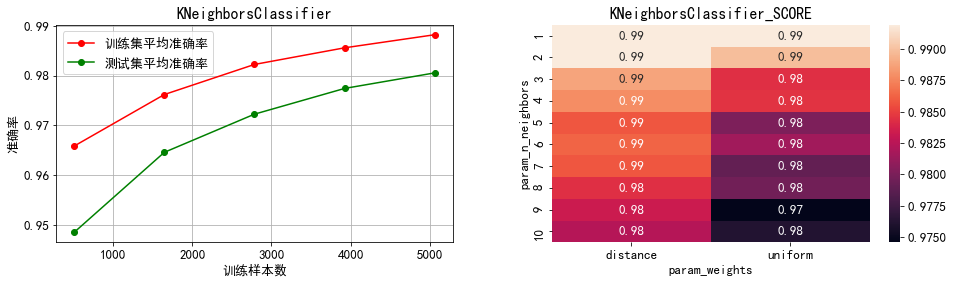

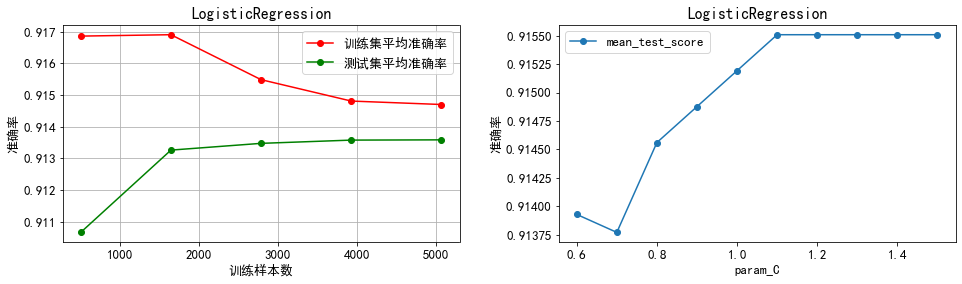

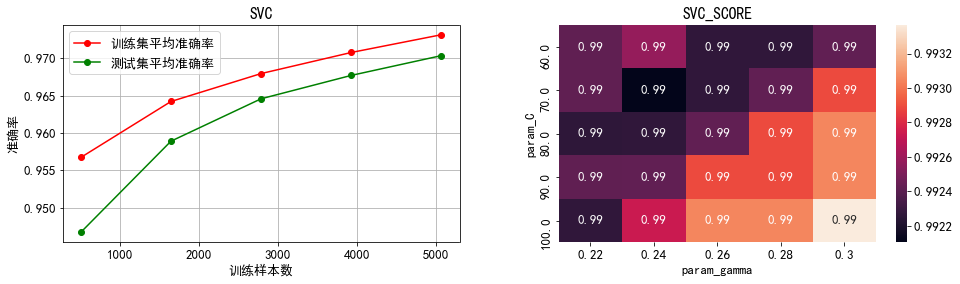

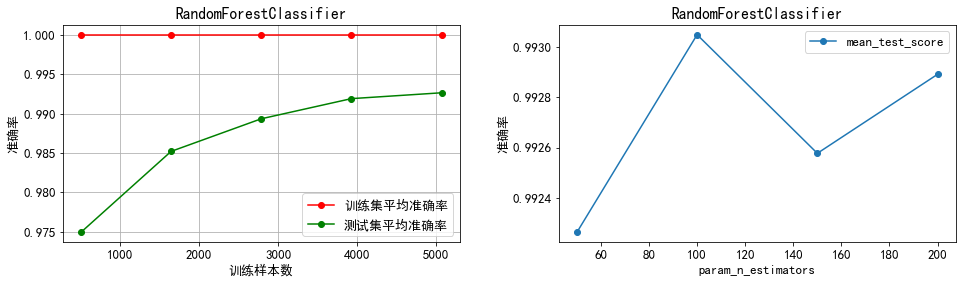

In [56]:
knn.learningcurve(xtrain,ytrain)
lr.learningcurve(xtrain,ytrain)
svm.learningcurve(xtrain,ytrain)
rf.learningcurve(xtrain,ytrain)

In [57]:
ensemble_voting=VotingClassifier(estimators=[('lr',lr.best_estimator),('svm',svm.best_estimator),('rf',rf.best_estimator)],voting='soft')
ensemble_voting.fit(xtrain,ytrain)
auc=roc_auc_score(y_test,ensemble_voting.predict_proba(x_test)[:,1])
print('VotingClassifier的auc为:%.4f'%(auc))


VotingClassifier的auc为:0.9971


In [58]:
rf.best_estimator

RandomForestClassifier()

In [90]:
rf.best_estimator.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)